In [1]:
# Error analysis of text classifier
# Violeta Berdejo-Espinola
# January 2025

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../results/error analysis/error_analysis_predictions_with_tetx.csv')
df.rename(columns={'0':'text'},
          inplace=True)
df

,Unnamed: 0,neg_label,pos_label,y_true,prediction_label,text
0,0,0.423898,0.576102,0,fp,tiempo rendimiento costo aserrado algarrobo bl...
1,1,0.923126,0.076874,0,tn,inicio época reproductivo tiempo defensa terri...
2,2,0.853603,0.146397,0,tn,fluctuación estacional infestación diverso hos...
3,3,0.883252,0.116748,0,tn,proceso analítico jerárquico seleccionar métod...
4,4,0.565929,0.434071,0,tn,ecología impacto manejo ciervo colorado cervus...
...,...,...,...,...,...,...
999,999,0.826809,0.173191,0,tn,caracterización bosque queñual polylepis spp u...
1000,1000,0.985122,0.014878,0,tn,variación morfológico lagartija partenogenétic...
1001,1001,0.991246,0.008754,0,tn,hippidion saldiasi roth mammalia perissodactyl...
1002,1002,0.939916,0.060084,0,tn,análisis geomático espacial cambio uso suelo h...


In [3]:
# subset predictions

tp = df.loc[df["prediction_label"] == 'tp', 'text']
fn = df.loc[df["prediction_label"] == 'fn', 'text']
fp = df.loc[df["prediction_label"] == 'fp', 'text']
tn = df.loc[df["prediction_label"] == 'tn', 'text']
len(tn), len(fp), len(fn), len(tp)

(916, 75, 1, 12)

# create wordclouds

In [4]:
# pip install wordcloud

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

# true positive

def create_wordcloud(text, name):
    wordcloud = WordCloud(background_color="white", colormap='seismic_r', max_words=50).generate(' '.join(text))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f'../results/error analysis/wordcloud_{name}.png')

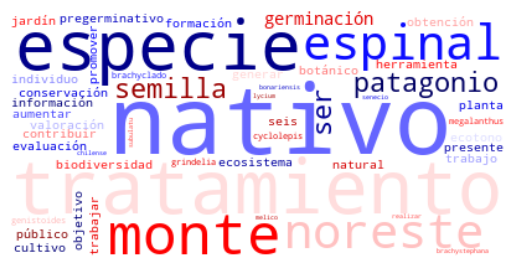

In [5]:
create_wordcloud(fn, 'fn')

# calculate docuement word frequency 

In [6]:
from nltk. probability import FreqDist

def doc_word_freq(predictions_list):
    docs = []
    docs_freq = []

    for row in predictions_list:
        sent = [word for word in row.split()]
        fd = FreqDist(sent).most_common(15)
        docs.append(sent)
        docs_freq.append(fd)
        
    return docs_freq

In [7]:
# get document word frequency and change from FreqDist data type to dict
# returns list of dict

word_freq_tn = [dict(item) for item in doc_word_freq(tn)]
word_freq_fp = [dict(item) for item in doc_word_freq(fp)]
word_freq_fn = [dict(item) for item in doc_word_freq(fn)]
word_freq_tp = [dict(item) for item in doc_word_freq(tp)]

In [8]:
# merge text and word frequencies

def create_df(text,word_freq,pred):
    df = pd.DataFrame({
        'text':text,
        'word_frequency':word_freq,
        'prediction':pred
        })
    return df

In [9]:
create_df(tn, word_freq_tn, 'tn').to_csv('../results/error analysis/tn_text_word_freq.csv', encoding='utf-8', index=False)
create_df(fp, word_freq_fp, 'fp').to_csv('../results/error analysis/fp_text_word_freq.csv', encoding='utf-8', index=False)
create_df(fn, word_freq_fn, 'fn').to_csv('../results/error analysis/fn_text_word_freq.csv', encoding='utf-8', index=False)
create_df(tp, word_freq_tp, 'tp').to_csv('../results/error analysis/tp_text_word_freq.csv', encoding='utf-8', index=False)

In [10]:
word_freq_fp = doc_word_freq(fp)
# word_freq_fp[0][0].most_common(10)
word_freq_fp

[[('aserrado', 7),
  ('rendimiento', 4),
  ('costo', 4),
  ('algarrobo', 4),
  ('tiempo', 3),
  ('blanco', 3),
  ('santiago', 3),
  ('estero', 3),
  ('madera', 3),
  ('productividad', 3),
  ('prosopis', 2),
  ('trabajo', 2),
  ('volumen', 2),
  ('corteza', 2),
  ('pie²', 2)],
 [('quemado', 11),
  ('especie', 10),
  ('sitio', 6),
  ('plantación', 5),
  ('área', 4),
  ('dominante', 4),
  ('disturbado', 4),
  ('desempeño', 4),
  ('crecimiento', 3),
  ('fuego', 3),
  ('mayor', 3),
  ('diferencia', 3),
  ('ser', 3),
  ('supervivencia', 2),
  ('dos', 2)],
 [('especie', 5),
  ('declarar', 2),
  ('monumento', 2),
  ('natural', 2),
  ('faún', 2),
  ('silvestre', 2),
  ('santiago', 2),
  ('estero', 2),
  ('índice', 2),
  ('identificar', 2),
  ('propuesta', 1),
  ('aplicar', 1),
  ('sumin', 1),
  ('sumar', 1),
  ('tener', 1)],
 [('vermicompostaje', 5),
  ('residuo', 4),
  ('especie', 4),
  ('ciclo', 3),
  ('vida', 3),
  ('tratamiento', 3),
  ('nuevo', 3),
  ('lombriz', 2),
  ('tierra', 2),
  ('ap

In [11]:
word_freq_fp

[[('aserrado', 7),
  ('rendimiento', 4),
  ('costo', 4),
  ('algarrobo', 4),
  ('tiempo', 3),
  ('blanco', 3),
  ('santiago', 3),
  ('estero', 3),
  ('madera', 3),
  ('productividad', 3),
  ('prosopis', 2),
  ('trabajo', 2),
  ('volumen', 2),
  ('corteza', 2),
  ('pie²', 2)],
 [('quemado', 11),
  ('especie', 10),
  ('sitio', 6),
  ('plantación', 5),
  ('área', 4),
  ('dominante', 4),
  ('disturbado', 4),
  ('desempeño', 4),
  ('crecimiento', 3),
  ('fuego', 3),
  ('mayor', 3),
  ('diferencia', 3),
  ('ser', 3),
  ('supervivencia', 2),
  ('dos', 2)],
 [('especie', 5),
  ('declarar', 2),
  ('monumento', 2),
  ('natural', 2),
  ('faún', 2),
  ('silvestre', 2),
  ('santiago', 2),
  ('estero', 2),
  ('índice', 2),
  ('identificar', 2),
  ('propuesta', 1),
  ('aplicar', 1),
  ('sumin', 1),
  ('sumar', 1),
  ('tener', 1)],
 [('vermicompostaje', 5),
  ('residuo', 4),
  ('especie', 4),
  ('ciclo', 3),
  ('vida', 3),
  ('tratamiento', 3),
  ('nuevo', 3),
  ('lombriz', 2),
  ('tierra', 2),
  ('ap